# Project 2 - Aimes Housing Data and Kaggle Challenge

### By Alex Lau

In [979]:
# importing all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, ElasticNet, ElasticNetCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.datasets import make_classification

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [980]:
# reading the files into dataframes
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [981]:
df_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [982]:
df_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [983]:
# replacing indices in the training and testing dataframes with ID column
df_train.set_index('Id', inplace = True)
df_test.set_index('Id', inplace = True)

## EDA

In [984]:
df_train.shape

(2051, 80)

In [985]:
df_test.shape

(878, 79)

In [986]:
df_train.describe()

PID  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2.051000e+03  2051.000000   1721.000000    2051.000000   2051.000000   
mean   7.135900e+08    57.008776     69.055200   10065.208191      6.112140   
std    1.886918e+08    42.824223     23.260653    6742.488909      1.426271   
min    5.263011e+08    20.000000     21.000000    1300.000000      1.000000   
25%    5.284581e+08    20.000000     58.000000    7500.000000      5.000000   
50%    5.354532e+08    50.000000     68.000000    9430.000000      6.000000   
75%    9.071801e+08    70.000000     80.000000   11513.500000      7.000000   
max    9.241520e+08   190.000000    313.000000  159000.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2051.000000  2051.000000     2051.000000   2029.000000   2050.000000   
mean       5.562165  1971.708922     1984.190151     99.695909    442.300488   
std        1.104497    30.177889       21.036250    174.963129    461.204124   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1953.500000     1964.500000      0.000000      0.000000   
50%        5.000000  1974.000000     1993.000000      0.000000    368.000000   
75%        6.000000  2001.000000     2004.000000    161.000000    733.750000   
max        9.000000  2010.000000     2010.000000   1600.000000   5644.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2051.000000    2051.000000     2051.000000  2051.000000   
mean   ...     93.833740      47.556802       22.571916     2.591419   
std    ...    128.549416      66.747241       59.845110    25.229615   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     547.000000      432.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2051.000000  2051.000000   2051.000000  2051.000000  2051.000000   
mean      16.511458     2.397855     51.574354     6.219893  2007.775719   
std       57.374204    37.782570    573.393985     2.744736     1.312014   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      490.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2051.000000  
mean   181469.701609  
std     79258.659352  
min     12789.000000  
25%    129825.000000  
50%    162500.000000  
75%    214000.000000  
max    611657.000000  

[8 rows x 38 columns]

#### Interestingly there are 2 homes selling for around $13,000

In [987]:
# checking lowest home prices, we will remove these as outliers
df_train['SalePrice'].sort_values(ascending = True)

Id
182      12789
1554     13100
727      34900
2844     35000
2881     35311
         ...  
2333    556581
434     582933
2451    584500
1638    591587
45      611657
Name: SalePrice, Length: 2051, dtype: int64

#### Correlation

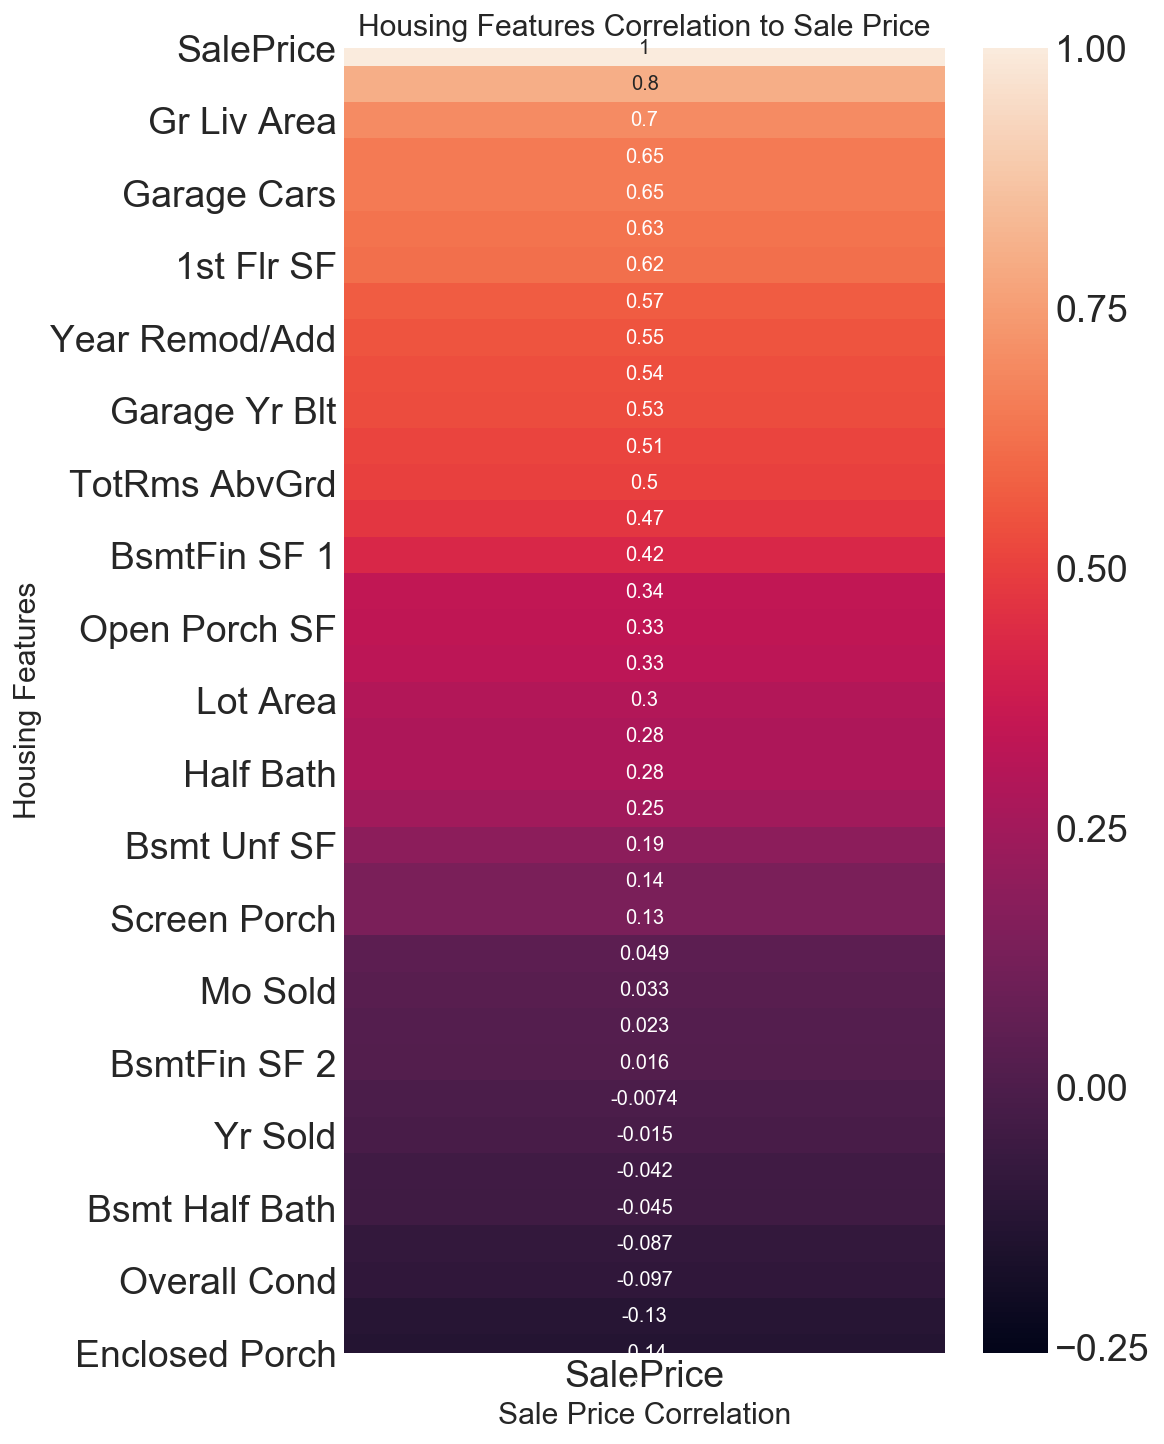

In [988]:
# Checking correlation all the features
plt.figure(figsize = (6,12))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), annot = True)
plt.title('Housing Features Correlation to Sale Price', fontsize = 15)
plt.xlabel('Sale Price Correlation', fontsize = 15)
plt.ylabel('Housing Features', fontsize = 15);

In [989]:
# sorting this by descending order
top_features = df_train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False)
top_features.drop(['SalePrice'],inplace = True)

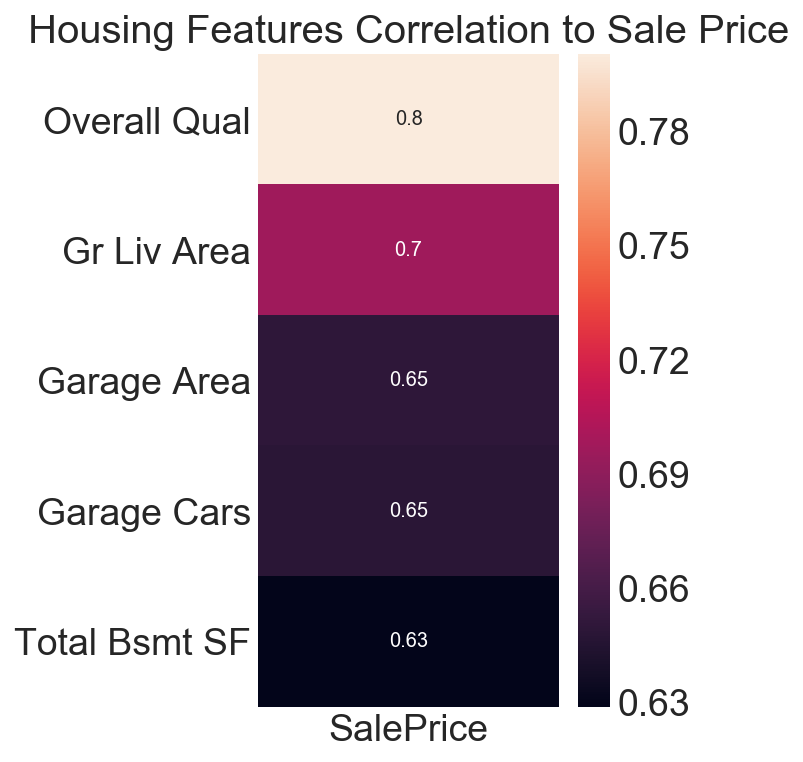

In [990]:
# Checking correlation all the features
plt.figure(figsize = (3,6))
sns.heatmap(top_features.head(), annot = True)
sns.set(font_scale=1.7)
plt.title('Housing Features Correlation to Sale Price', fontsize = 20)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t);

#### Visualizing top 5 features by correlation
#### Overall Quality

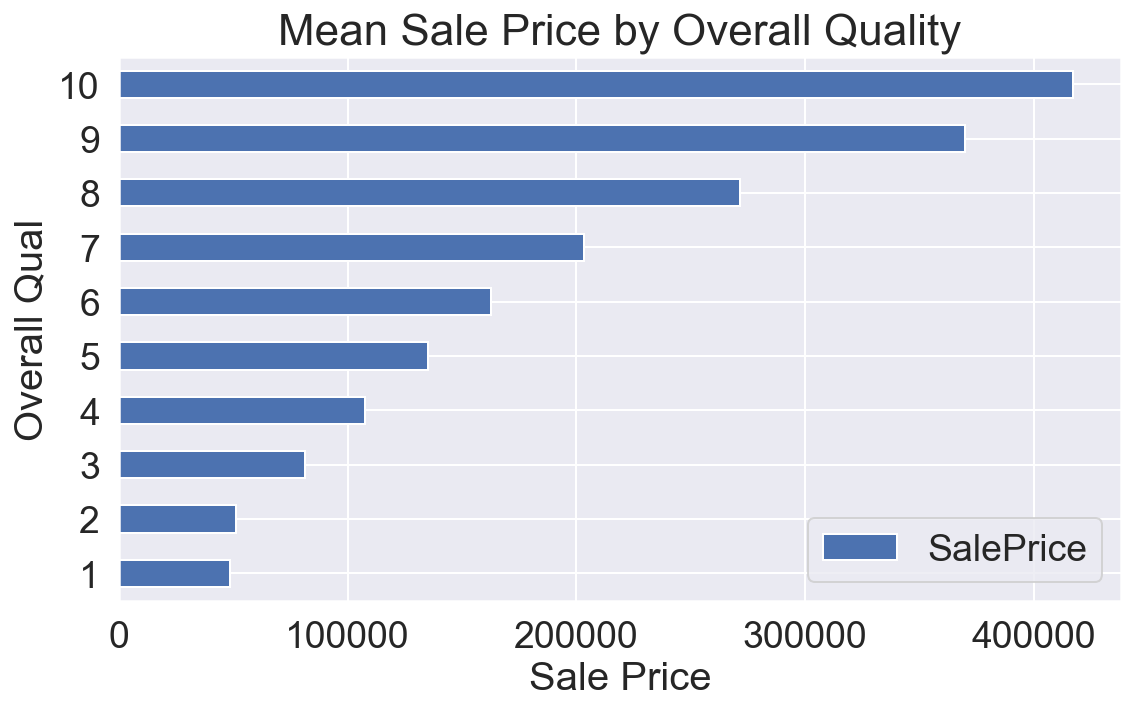

In [991]:
# Plotting mean sale prices per quality level
df_train.groupby(['Overall Qual'])[['SalePrice']].mean().plot(kind = 'barh', figsize = (8, 5))
plt.title('Mean Sale Price by Overall Quality', size = 22)
plt.ylabel('Overall Qual', size = 20)
plt.xlabel('Sale Price', size = 20);

#### Above Ground Living Area

Text(0, 0.5, 'Sale Price')

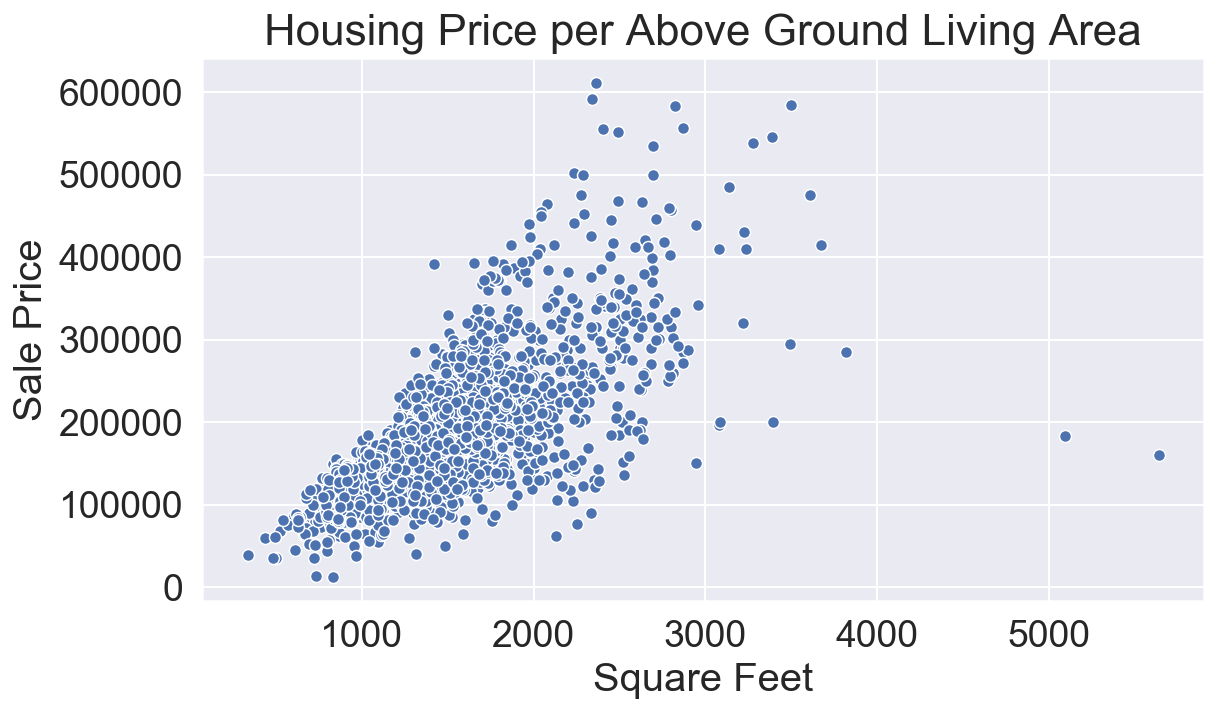

In [992]:
# Plotting Sale Price vs Above Ground Living Area
plt.figure(figsize = (8, 5))
sns.scatterplot(x = df_train['Gr Liv Area'], y = df_train['SalePrice'])
plt.title('Housing Price per Above Ground Living Area', size = 22)
plt.xlabel('Square Feet', size = 20)
plt.ylabel('Sale Price', size = 20)

In [993]:
# Finding these IDs
df_train[df_train['Gr Liv Area'] > 4000]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                            
1499  908154235           60        RL         313.0     63887   Pave   NaN   
2181  908154195           20        RL         128.0     39290   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
Id                                     ...                                  
1499       IR3          Bnk    AllPub  ...            0       480      Gd   
2181       IR1          Bnk    AllPub  ...            0         0     NaN   

     Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                       
1499   NaN          NaN        0       1     2008        New     160000  
2181   NaN         Elev    17000      10     2007        New     183850  

[2 rows x 80 columns]

#### Garage Area

Text(0, 0.5, 'Sale Price')

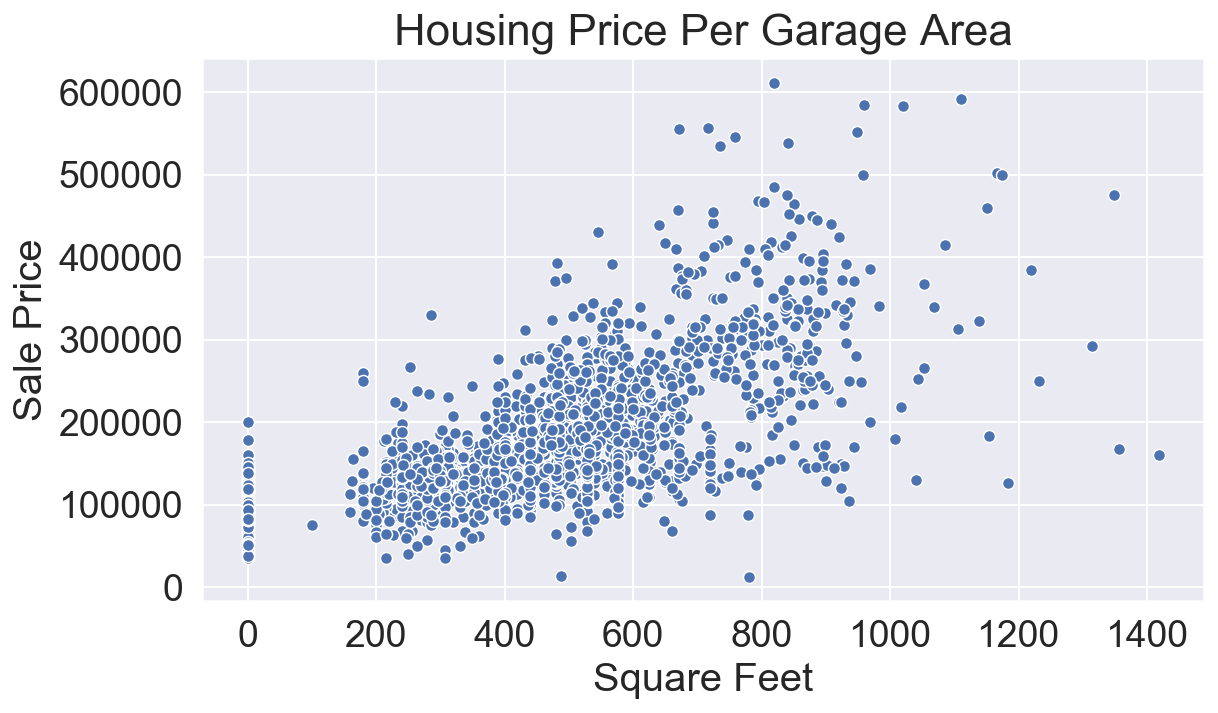

In [994]:
# Plotting Sale Price vs Garage Area
plt.figure(figsize = (8, 5))
sns.scatterplot(x = df_train['Garage Area'], y = df_train['SalePrice'])
plt.title('Housing Price Per Garage Area', size = 22)
plt.xlabel('Square Feet', size = 20)
plt.ylabel('Sale Price', size = 20)

#### Number of Garage Cars
#### Interestingly the mean sale price decreases above 3

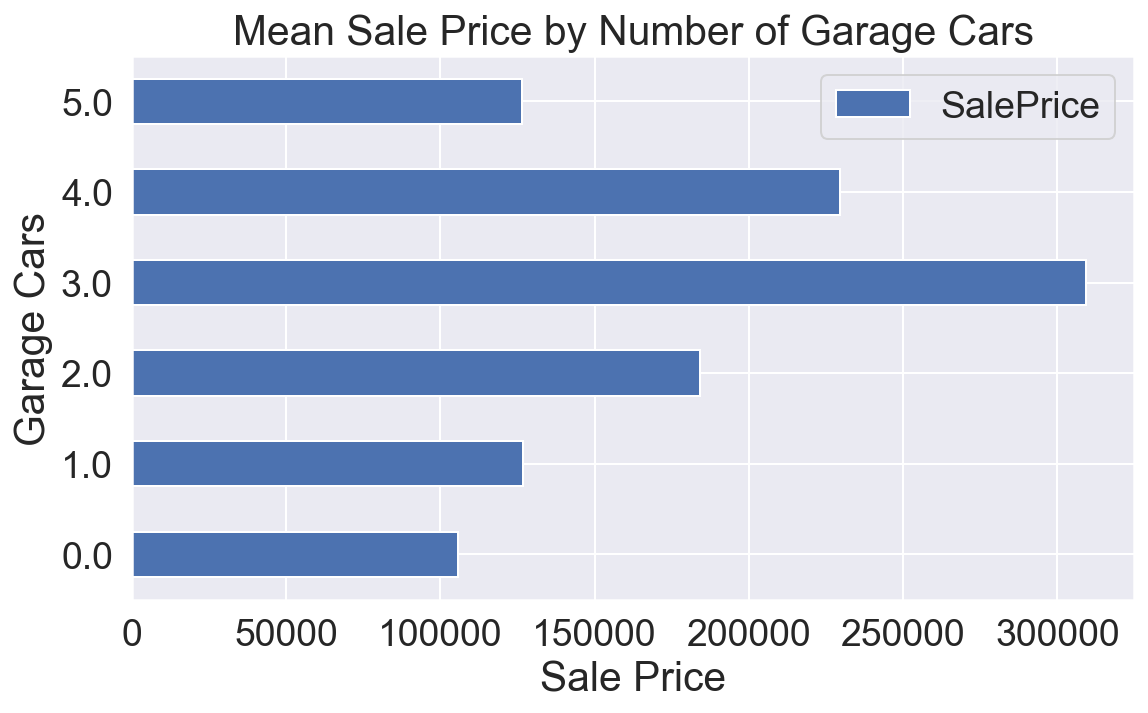

In [995]:
# Plotting mean sale prices per garage car amount. This suggests we will set these as categories.
df_train.groupby(['Garage Cars'])[['SalePrice']].mean().plot(kind = 'barh', figsize = (8, 5))
plt.title('Mean Sale Price by Number of Garage Cars')
plt.xlabel('Sale Price');

#### Total Basement Square Feet

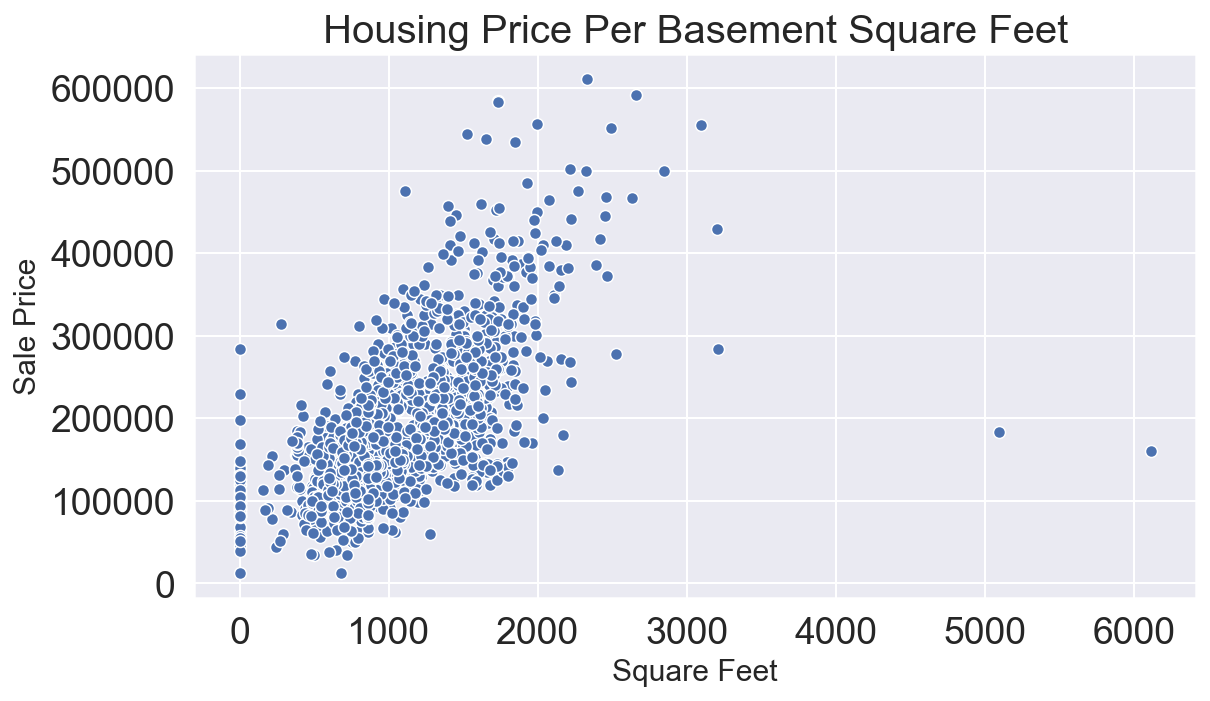

In [996]:
# Plotting Sale Price vs Total Basement Square Feet
plt.figure(figsize = (8, 5))
sns.scatterplot(x = df_train['Total Bsmt SF'], y = df_train['SalePrice'])
plt.title('Housing Price Per Basement Square Feet', size = 20)
plt.xlabel('Square Feet', size = 15)
plt.ylabel('Sale Price', size = 15);

In [997]:
# Finding these IDs, they are the 2 identified earlier
df_train[df_train['Total Bsmt SF'] > 4000]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                            
1499  908154235           60        RL         313.0     63887   Pave   NaN   
2181  908154195           20        RL         128.0     39290   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
Id                                     ...                                  
1499       IR3          Bnk    AllPub  ...            0       480      Gd   
2181       IR1          Bnk    AllPub  ...            0         0     NaN   

     Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                       
1499   NaN          NaN        0       1     2008        New     160000  
2181   NaN         Elev    17000      10     2007        New     183850  

[2 rows x 80 columns]

#### Reviewing distribution of sale prices

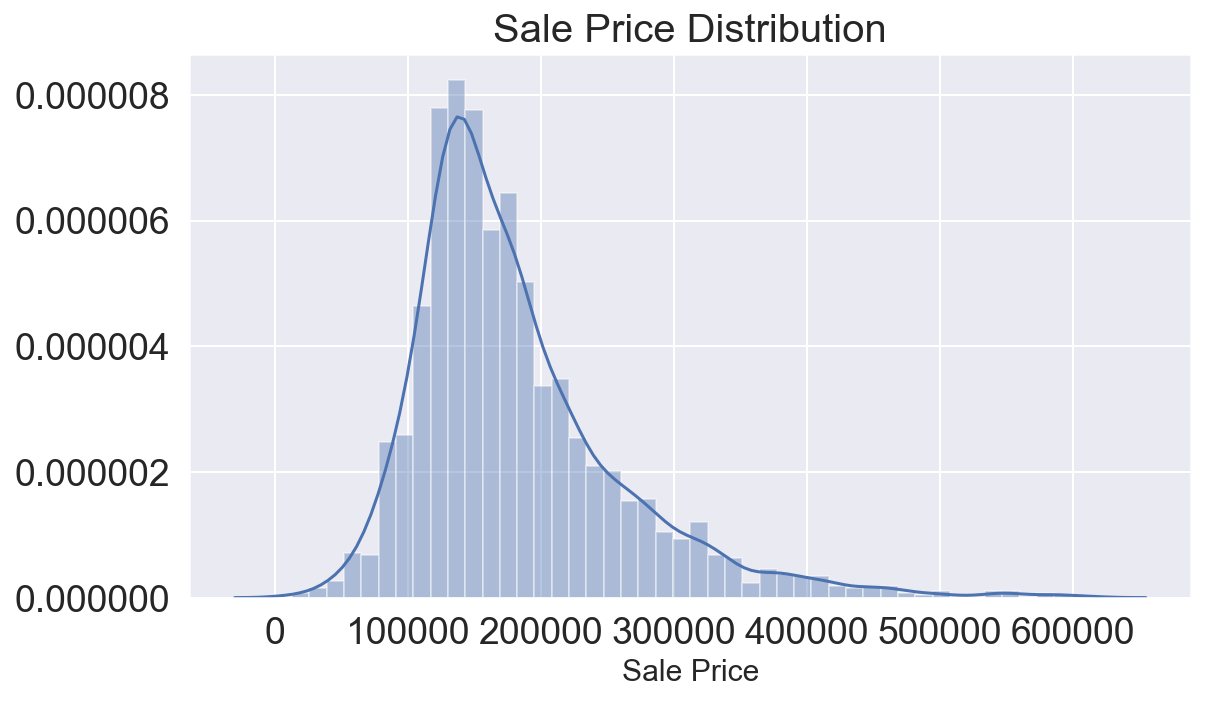

In [998]:
# This is heavily right skewed 
plt.figure(figsize = (8, 5))
sns.distplot(df_train['SalePrice'], hist = True)
plt.title('Sale Price Distribution', size = 20)
plt.xlabel('Sale Price', size = 15);

#### The logarithmic sale price yields a more normal distribution

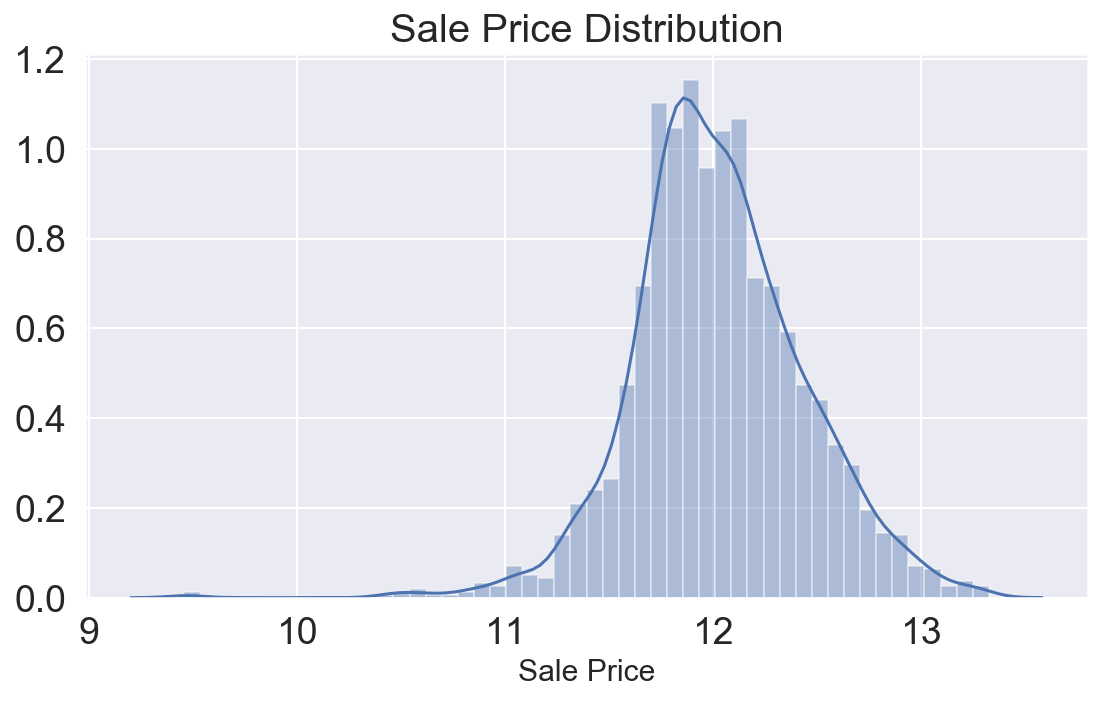

In [999]:
# It appears taking the Log of the Sale Price values yield a 

plt.figure(figsize = (8, 5))
sns.distplot(np.log(df_train['SalePrice']), hist = True)
plt.title('Sale Price Distribution', size = 20)
plt.xlabel('Sale Price', size = 15);

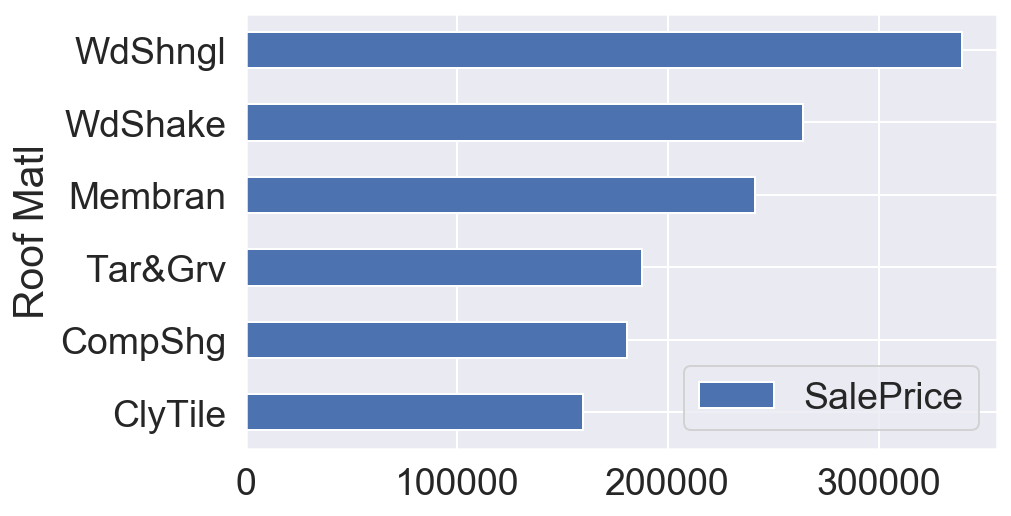

In [1000]:
df_train.groupby(['Roof Matl'])[['SalePrice']].mean().sort_values(by = 'SalePrice', ascending = True).plot(kind = 'barh');


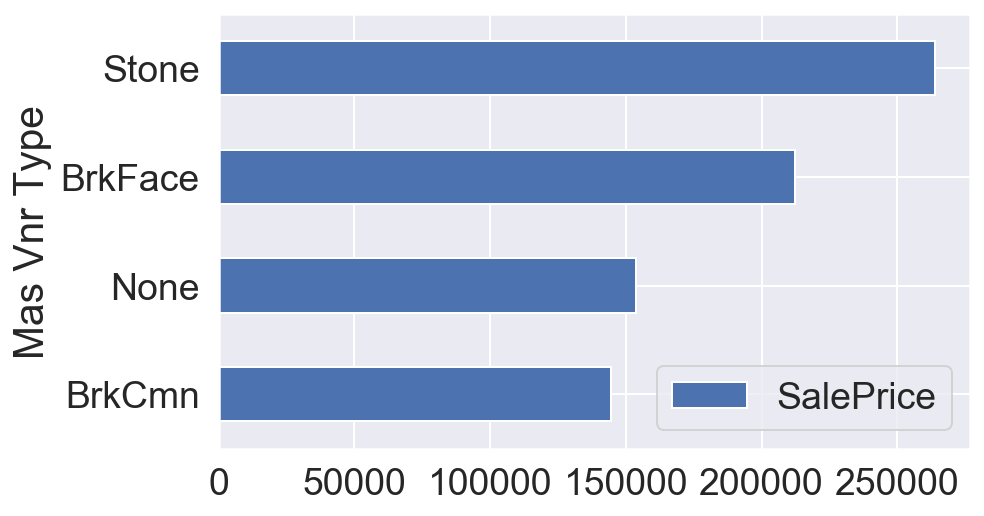

In [1001]:
df_train.groupby(['Mas Vnr Type'])[['SalePrice']].mean().sort_values(by = 'SalePrice', ascending = True).plot(kind = 'barh')

## Cleaning Data ##
### Removing Outliers

In [1002]:
# We are removing the 4 outliers idendified during EDA
df_train.drop([2181, 1499, 1554, 182], inplace = True)

# these are additional outliers we have identified via testing
df_train.drop([1183, 1783], inplace = True)

### Convert text into numbers ###

In [1003]:
# We need to convert the Ordinal string data into numbers to feed into our linear regression model
# Data dictionary provided in this project reveals the ranking system in English. We have interpretted these to numbers. 

rating_dict = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, np.nan : 0, 'NA': 0}
bsmt_expo_dict = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0, 'NA': 0}
bsmt_fin_dict = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
electrical_dict = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, np.nan: 0, 'NA': 0}
fence_dict = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, np.nan: 0, 'NA': 0}
functional_dict = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal':1, np.nan: 0, 'NA': 0}
garage_finish_dict = {'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
land_slope_dict = {'Gtl': 3, 'Mod': 2, 'Sev': 1, np.nan: 0, 'NA': 0}
lot_shape_dict = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 0, 'NA': 0}
paved_drive_dict = {'Y': 3, 'P': 2, 'N': 1, np.nan: 0, 'NA': 0}
pool_qc_dict = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, np.nan: 0, 'NA': 0}
utilities_dict = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1, np.nan: 0, 'NA': 0}

In [1004]:
# Converting ordinal features from TRAINING data into numbers
df_train['Bsmt Cond'].replace(rating_dict, inplace = True)
df_train['Bsmt Qual'].replace(rating_dict, inplace = True)
df_train['Exter Cond'].replace(rating_dict, inplace = True)
df_train['Exter Qual'].replace(rating_dict, inplace = True)
df_train['Fireplace Qu'].replace(rating_dict, inplace = True)
df_train['Garage Cond'].replace(rating_dict, inplace = True) 
df_train['Garage Qual'].replace(rating_dict, inplace = True)
df_train['Heating QC'].replace(rating_dict, inplace = True)
df_train['Kitchen Qual'].replace(rating_dict, inplace = True)
df_train['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_train['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_train['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_train['Electrical'].replace(electrical_dict, inplace = True)
df_train['Fence'].replace(fence_dict, inplace = True)
df_train['Functional'].replace(functional_dict, inplace = True)
df_train['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_train['Land Slope'].replace(land_slope_dict, inplace = True)
df_train['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_train['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_train['Pool QC'].replace(pool_qc_dict, inplace = True)
df_train['Utilities'].replace(utilities_dict, inplace = True)

In [1005]:
# Converting ordinal features from TESTING data into numbers
df_test['Bsmt Cond'].replace(rating_dict, inplace = True)
df_test['Bsmt Qual'].replace(rating_dict, inplace = True)
df_test['Exter Cond'].replace(rating_dict, inplace = True)
df_test['Exter Qual'].replace(rating_dict, inplace = True)
df_test['Fireplace Qu'].replace(rating_dict, inplace = True)
df_test['Garage Cond'].replace(rating_dict, inplace = True) 
df_test['Garage Qual'].replace(rating_dict, inplace = True)
df_test['Heating QC'].replace(rating_dict, inplace = True)
df_test['Kitchen Qual'].replace(rating_dict, inplace = True)
df_test['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_test['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_test['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_test['Electrical'].replace(electrical_dict, inplace = True)
df_test['Fence'].replace(fence_dict, inplace = True)
df_test['Functional'].replace(functional_dict, inplace = True)
df_test['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_test['Land Slope'].replace(land_slope_dict, inplace = True)
df_test['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_test['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_test['Pool QC'].replace(pool_qc_dict, inplace = True)
df_test['Utilities'].replace(utilities_dict, inplace = True)

In [1006]:
# checking null values in TRAINING
df_train.isnull().sum().sort_values(ascending = False).head(16)

Misc Feature      1981
Alley             1905
Lot Frontage       329
Garage Yr Blt      114
Garage Type        113
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Cars          1
BsmtFin SF 1         1
SalePrice            0
dtype: int64

In [1007]:
# checking null values of TESTING data.
df_test.isnull().sum().sort_values(ascending = False).head(8)

Misc Feature     837
Alley            820
Lot Frontage     160
Garage Yr Blt     45
Garage Type       44
Mas Vnr Type       1
Mas Vnr Area       1
Exter Qual         0
dtype: int64

In [1008]:
# creating dictionary to replace ALL null values
# nominal features will be replaced with 'None'
nominal_dict = {np.nan:'None'}

# Continuous features will be replaced with the mean values of those features.
lot_frontage_dict = {np.nan: df_train['Lot Frontage'].mean()}
mas_vnr_area_dict = {np.nan: df_train['Mas Vnr Area'].mean()}
bsmtFin_SF_2_dict = {np.nan: df_train['BsmtFin SF 2'].mean()}
garage_area_dict = {np.nan: df_train['Garage Area'].mean()}
bmst_unf_sf_dict = {np.nan: df_train['Bsmt Unf SF'].mean()}
total_bsmt_sf_dict = {np.nan: df_train['Total Bsmt SF'].mean()}
bmst_fin_sf_1_dict = {np.nan: df_train['BsmtFin SF 1'].mean()}

# Discrete features will be replaced with the median values
garage_yr_blt_dict = {np.nan: df_train['Garage Yr Blt'].median()}
bsmt_full_bath_dict = {np.nan: df_train['Bsmt Full Bath'].median()}
bsmt_half_bath_dict = {np.nan: df_train['Bsmt Half Bath'].median()}
garage_cars_dict = {np.nan: df_train['Garage Cars'].median()}

In [1009]:
# Replacing nulls in TRAINING data
# Nominal features
df_train['Garage Type'].replace(nominal_dict, inplace = True)
df_train['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_train['Misc Feature'].replace(nominal_dict, inplace = True)
df_train['Alley'].replace(nominal_dict, inplace = True)

# remaining features
df_train['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_train['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_train['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_train['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_train['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_train['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_train['Garage Cars'].replace(garage_cars_dict, inplace = True)
df_train['Garage Area'].replace(garage_area_dict, inplace = True)
df_train['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_train['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_train['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

In [1010]:
# Replacing nulls in TESTING data
# nominal features
df_test['Garage Type'].replace(nominal_dict, inplace = True)
df_test['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_test['Misc Feature'].replace(nominal_dict, inplace = True)
df_test['Alley'].replace(nominal_dict, inplace = True)

# remaining features
df_test['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_test['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_test['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_test['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_test['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_test['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_test['Garage Cars'].replace(garage_cars_dict, inplace = True)
df_test['Garage Area'].replace(garage_area_dict, inplace = True)
df_test['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_test['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_test['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

In [1011]:
# checking remaining null values in the TRAINING data
df_train.isnull().sum().sort_values(ascending = False).head(2)

SalePrice    0
Sale Type    0
dtype: int64

In [1012]:
# checking remaining null values in the TESTING data
df_test.isnull().sum().sort_values(ascending = False).head(2)

Sale Type     0
Exter Cond    0
dtype: int64

## Preprocessing & Modeling

In [1013]:
# Removing PID column, since that is a unique identifier
df_train.drop(columns = 'PID', inplace = True)
df_test.drop(columns = 'PID', inplace = True)

In [1014]:
# Categorizing the features
nominal_features = ['MS SubClass', 'MS Zoning', 'Street', 'Misc Feature', 'Land Contour', 'Lot Config', 'Neighborhood', 
                    'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                    'Exterior 2nd', 'Alley', 'Foundation', 'Garage Type', 'Heating', 'Central Air', 'Mas Vnr Type', 
                    'Sale Type']

discrete_features = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 
                     'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 
                     'Mo Sold', 'Yr Sold']

continuous_features = ['Lot Area', 'Lot Frontage', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 
                       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Wood Deck SF', 'Open Porch SF',
                       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Total Bsmt SF', 'Garage Area', 
                       'Misc Val']

ordinal_features = ['Pool QC', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Fence', 
                    'Exter Qual', 'Exter Cond', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 
                    'Bsmt Exposure', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Bsmt Qual', 'Bsmt Cond', 
                    'Kitchen Qual', 'Functional', 'BsmtFin Type 1', 'Paved Drive']

In [1015]:
# Getting Dummies for categorizationss
# TRAIN
df_train = pd.get_dummies(data = df_train, columns = nominal_features)
df_train = pd.get_dummies(data = df_train, columns = discrete_features)

# TEST
df_test = pd.get_dummies(data = df_test, columns = nominal_features)
df_test = pd.get_dummies(data = df_test, columns = discrete_features)

In [1016]:
# Checking columns that exist in TEST but not in TRAIN
set(df_test.columns) - set(df_train.columns)

{'Bsmt Full Bath_0',
 'Bsmt Full Bath_1',
 'Bsmt Full Bath_2',
 'Bsmt Half Bath_0',
 'Bsmt Half Bath_1',
 'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Garage Cars_0',
 'Garage Cars_1',
 'Garage Cars_2',
 'Garage Cars_3',
 'Garage Cars_4',
 'Garage Yr Blt_1906.0',
 'Garage Yr Blt_1908.0',
 'Garage Yr Blt_1943.0',
 'Heating_Floor',
 'Mas Vnr Type_CBlock',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Sale Type_VWD',
 'Year Built_1882',
 'Year Built_1902',
 'Year Built_1904',
 'Year Built_1906',
 'Year Built_1907'}

In [1017]:
# checking columns that exist in TRAIN but not in TEST
set(df_train.columns) - set(df_test.columns)

{'Bedroom AbvGr_8',
 'Bsmt Full Bath_0.0',
 'Bsmt Full Bath_1.0',
 'Bsmt Full Bath_2.0',
 'Bsmt Full Bath_3.0',
 'Bsmt Half Bath_0.0',
 'Bsmt Half Bath_1.0',
 'Bsmt Half Bath_2.0',
 'Condition 2_Artery',
 'Condition 2_PosN',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'Fireplaces_4',
 'Garage Cars_0.0',
 'Garage Cars_1.0',
 'Garage Cars_2.0',
 'Garage Cars_3.0',
 'Garage Cars_4.0',
 'Garage Cars_5.0',
 'Garage Yr Blt_1895.0',
 'Garage Yr Blt_1896.0',
 'Garage Yr Blt_1914.0',
 'Garage Yr Blt_1919.0',
 'Garage Yr Blt_1929.0',
 'Garage Yr Blt_1933.0',
 'Garage Yr Blt_1936.0',
 'Garage Yr Blt_1942.0',
 'Garage Yr Blt_1945.0',
 'Garage Yr Blt_2207.0',
 'Heating_OthW',
 'Heating_Wall',
 'MS SubClass_150',
 'MS Zoning_A (agr)',
 'Misc Feature_TenC',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Roof Matl_Membran',
 'SalePrice',
 'TotRms AbvGrd_13',
 'TotRms AbvGrd_14',
 'To

### Same columns on both dataframes ###

In [1018]:
# provides the columns that exist in Train that do NOT exist in Test (and vice versa0)
add_columns_to_train = set(df_test.columns) - set(df_train.columns)
add_columns_to_test = set(df_train.columns) - set(df_test.columns)

# Add columns that were exclusive to test.csv to df_train (and vice versa)
for col in add_columns_to_train:
    df_train[col] = 0
for col in add_columns_to_test:
    df_test[col] = 0

# Reorder df_train to match df_test columns
df_train = df_train[df_test.columns]

# Removing SalePrice from Test
df_test = df_test.drop('SalePrice', axis = 1)

In [1019]:
df_train.shape

(2045, 585)

In [1020]:
df_test.shape

(878, 584)

In [1021]:
# drops first column of the group of dummy columns 
for nom in nominal_features:
    dummy_list = [col for col in df_train.columns if nom in col]
    df_train.drop(columns = dummy_list[0], inplace = True)
    df_test.drop(columns = dummy_list[0], inplace = True)

In [1022]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

In [1023]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 109 to 10
Columns: 563 entries, Lot Frontage to Garage Yr Blt_1933.0
dtypes: float64(7), int64(41), object(20), uint8(495)
memory usage: 2.0+ MB


In [1024]:
# converting the object data types into float64 for both test and training data so we can run regressions
df_train = df_train.astype('float64')
df_test = df_test.astype('float64')

In [1025]:
df_train.shape

(2045, 563)

In [1026]:
df_test.shape

(878, 562)

In [1027]:
# Dropping the 1st column in dummied nominal feature columns

for col in df_train.columns:
    for nom in nominal_features:
        if nom in col:
            df_train.drop(columns = col, inplace = True)
    
for col in df_test.columns:
    for nom in nominal_features:
        if nom in col:
            df_test.drop(columns = col, inplace = True)

### Reviewing Correlations

In [1028]:
# finding correlation values
pd.set_option('display.max_rows', 562)
df_train.corr()[['SalePrice']].sort_values('SalePrice')

SalePrice
Full Bath_1           -0.520058
Fireplaces_0          -0.488144
Garage Cars_1.0       -0.406648
Year Remod/Add_1950   -0.322218
Half Bath_0           -0.296557
Lot Shape             -0.296185
Bsmt Full Bath_0.0    -0.281969
TotRms AbvGrd_5       -0.237478
Garage Cars_0.0       -0.232176
Garage Yr Blt_1980.0  -0.231961
TotRms AbvGrd_4       -0.186322
Fence                 -0.160724
TotRms AbvGrd_6       -0.140914
Enclosed Porch        -0.136928
Kitchen AbvGr_2       -0.129389
Bedroom AbvGr_2       -0.124537
Year Built_1920       -0.121645
Year Built_1910       -0.104774
Overall Cond          -0.102177
Garage Yr Blt_1920.0  -0.091478
Year Built_1922       -0.082708
Year Remod/Add_1955   -0.082186
TotRms AbvGrd_3       -0.081903
Year Built_1950       -0.080866
Year Built_1970       -0.079073
Year Remod/Add_1970   -0.078494
Year Built_1955       -0.078052
Year Built_1900       -0.077468
Year Remod/Add_1972   -0.076891
Year Built_1930       -0.075906
Mo Sold_4             -0.075546
Year Built_1925       -0.074329
Year Built_1941       -0.073549
Garage Yr Blt_1950.0  -0.072433
Garage Yr Blt_1956.0  -0.072346
Year Remod/Add_1954   -0.071474
Year Remod/Add_1958   -0.071388
Year Built_1940       -0.071043
Garage Yr Blt_1965.0  -0.069991
Year Built_1924       -0.069499
Garage Yr Blt_1958.0  -0.069020
Year Built_1958       -0.067569
Year Built_1972       -0.066846
Year Built_1946       -0.066746
Year Built_1954       -0.066428
Garage Yr Blt_1930.0  -0.066188
Garage Yr Blt_1973.0  -0.063166
Year Remod/Add_1956   -0.062470
Year Remod/Add_1971   -0.062437
Land Slope            -0.062050
Garage Yr Blt_1954.0  -0.062047
Year Built_1956       -0.060561
Year Built_1949       -0.060015
Year Built_1948       -0.059576
Year Built_1945       -0.059308
Garage Yr Blt_1945.0  -0.057584
Year Built_1951       -0.057010
Year Remod/Add_1965   -0.056774
Garage Yr Blt_1967.0  -0.056483
Year Built_1915       -0.055974
Year Remod/Add_1968   -0.055222
Year Built_1967       -0.054660
Year Remod/Add_1959   -0.054637
Year Built_1971       -0.054127
Year Remod/Add_1962   -0.053588
Year Remod/Add_1951   -0.053290
Garage Yr Blt_1940.0  -0.053284
Year Built_1973       -0.053202
Year Built_1953       -0.053086
Garage Yr Blt_1948.0  -0.052558
Garage Yr Blt_1952.0  -0.052504
Year Remod/Add_1967   -0.052224
Garage Yr Blt_1951.0  -0.052095
Year Built_1961       -0.051262
Garage Yr Blt_1972.0  -0.050658
Year Built_1962       -0.050569
Garage Yr Blt_1962.0  -0.050484
Year Built_1947       -0.050066
Year Built_1926       -0.049872
Year Remod/Add_1953   -0.049426
Garage Yr Blt_1953.0  -0.049419
Year Built_1965       -0.049169
Year Remod/Add_1973   -0.049013
Garage Yr Blt_1941.0  -0.048987
Year Built_1963       -0.048969
Garage Yr Blt_1946.0  -0.048953
Year Remod/Add_1963   -0.048822
Year Built_1939       -0.048781
Year Built_1952       -0.048553
Bsmt Half Bath_1.0    -0.048308
Garage Yr Blt_1922.0  -0.047831
Garage Yr Blt_1910.0  -0.047759
Year Remod/Add_1952   -0.046802
Year Built_1927       -0.046594
Year Remod/Add_1960   -0.046013
Year Remod/Add_1961   -0.045774
Garage Yr Blt_1970.0  -0.045580
Garage Yr Blt_1961.0  -0.045354
Garage Yr Blt_1938.0  -0.044194
Garage Yr Blt_1979.0  -0.043837
Garage Yr Blt_1955.0  -0.043505
Garage Yr Blt_1949.0  -0.043125
Year Built_1938       -0.043006
Year Built_1957       -0.042991
Garage Yr Blt_1963.0  -0.042611
Year Built_1968       -0.042435
Garage Yr Blt_1968.0  -0.042277
Garage Yr Blt_1975.0  -0.042264
Garage Yr Blt_1957.0  -0.042121
Low Qual Fin SF       -0.041973
Garage Yr Blt_1924.0  -0.041337
Year Remod/Add_1957   -0.041311
Garage Yr Blt_1964.0  -0.040854
Garage Yr Blt_1936.0  -0.039913
Year Built_1921       -0.039899
Garage Yr Blt_1974.0  -0.039798
TotRms AbvGrd_2       -0.039776
Garage Yr Blt_1934.0  -0.039688
Year Remod/Add_1975   -0.039580
Year Remod/Add_1976   -0.039257
Year Built_1975       -0.039253
Year Remod/Add_1982   -0.038493
Year Remod/Add_1964   -0.037835
Garage Yr Blt_1939.0  -0.037506
Year Built_1896       

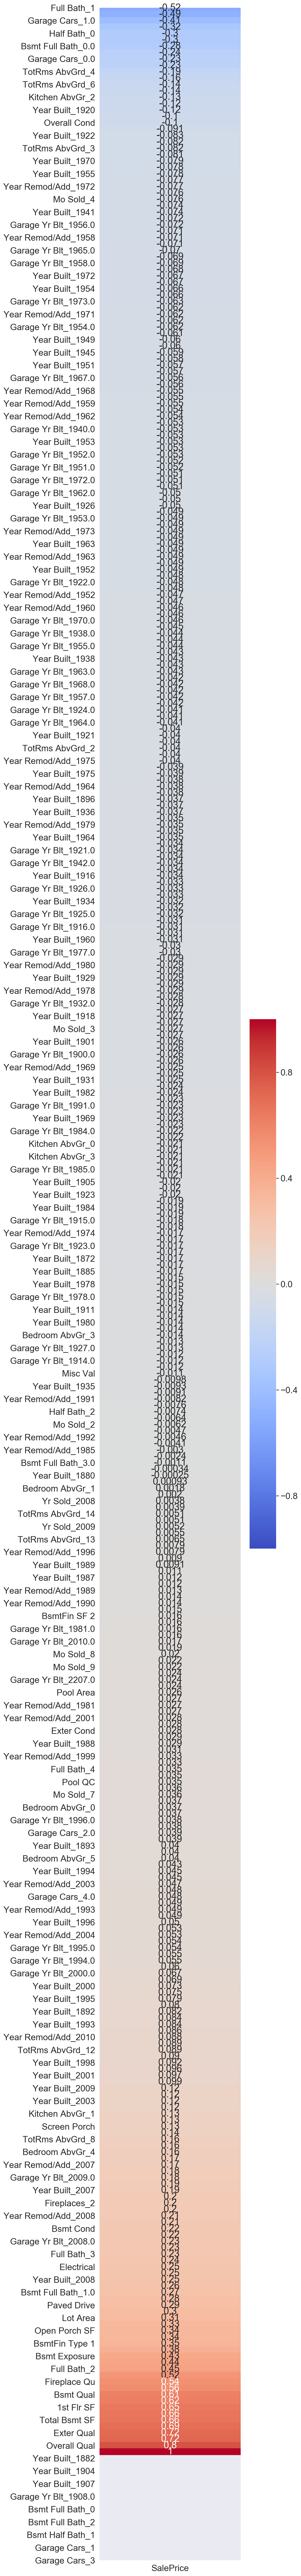

In [1080]:
# Heatmaps of updated feature list
plt.figure(figsize = (6, 100)) # this figsizes are in inches wide and tall
# need to specify which column you want to sort by, even though there is only 1 column
sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice'),
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1,
            annot=True);

In [1030]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 109 to 10
Columns: 402 entries, Lot Frontage to Garage Yr Blt_1933.0
dtypes: float64(402)
memory usage: 6.3 MB


## Testing the model

In [1031]:
# setting X and y variables
X = df_train.drop(columns = 'SalePrice')
y = df_train['SalePrice']

In [1032]:
#OLS on a test
X_ols = sm.add_constant(X)
est = sm.OLS(y, X.astype(float)).fit()
est.summary()

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     64.18
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        02:54:49   Log-Likelihood:                -23209.
No. Observations:                2045   AIC:                         4.715e+04
Df Residuals:                    1681   BIC:                         4.919e+04
Df Model:                         363                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Lot Frontage           116.8870     32.752      3.569      0.000      52.648     181.126
Lot Area                 0.6807      0.106      6.423      0.000       0.473       0.889
Lot Shape            -1246.8519   1114.406     -1.119      0.263   -3432.622     938.918
Utilities             1.158e+04   1.09e+04      1.066      0.286   -9718.390    3.29e+04
Land Slope           -4083.8071   2578.650     -1.584      0.113   -9141.509     973.895
Overall Qual          8538.0962    816.902     10.452      0.000    6935.845    1.01e+04
Overall Cond          5332.4646    776.601      6.866      0.000    3809.258    6855.671
Mas Vnr Area            26.2051      3.940      6.651      0.000      18.477      33.933
Exter Qual            1.127e+04   1822.493      6.182      0.000    7692.420    1.48e+04
Exter Cond            -220.6953   1807.689     -0.122      0.903   -3766.253    3324.862
Bsmt Qual             3595.3023   1363.823      2.636      0.008     920.333    6270.271
Bsmt Cond            -8931.7263   1595.213     -5.599      0.000   -1.21e+04   -5802.914
Bsmt Exposure         3461.6730    644.054      5.375      0.000    2198.442    4724.905
BsmtFin Type 1         -71.8926    422.931     -0.170      0.865    -901.420     757.635
BsmtFin SF 1            20.4613      2.122      9.644      0.000      16.300      24.622
BsmtFin Type 2         358.5107    975.299      0.368      0.713   -1554.418    2271.439
BsmtFin SF 2             7.0744      4.193      1.687      0.092      -1.150      15.298
Bsmt Unf SF             -4.0293      1.873     -2.151      0.032      -7.703      -0.356
Total Bsmt SF           23.5063      2.633      8.929      0.000      18.343      28.670
Electrical           -2164.0993   1678.283     -1.289      0.197   -5455.844    1127.645
1st Flr SF              27.4403      4.077      6.730      0.000      19.444      35.437
2nd Flr SF              17.0396      3.647      4.672      0.000       9.886      24.193
Low Qual Fin SF        -16.5526      9.684     -1.709      0.088     -35.547       2.442
Gr Liv Area             27.9273      3.904      7.153      0.000      20.269      35.586
Kitchen Qual          6028.2296   1444.072      4.174      0.000    3195.861    8860.599
Functional            5740.1328    937.190      6.125      0.000    3901.950    7578.316
Fireplace Qu          3651.0297   1165.502      3.133      0.002    1365.042    5937.018
Garage Finish          656.9765    958.248      0.686      0.493   -1222.508    2536.461
Garage Area             20.3981      6.714      3.038      0.002       7.229      33.567
Garage Qual           2828.0730   3169.666      0.892      0.372   -3388.835    9044.981
Garage Cond          -1620.5141   3201.248     -0.506      0.613   -7899.366    4658.337
Paved Drive             42.3726   1449.138      0.029    

### Train Test Split

In [1033]:
# running Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [1034]:
# Instantiate Standard Scaler.
sc = StandardScaler()

# Fit AND transform Standard Scaler to data in one step.
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [1035]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [1036]:
# plot predictions function
def plot_predictions(predictions, regression_type):

    # plotting training data for Y hat vs actual Y
    plt.figure(figsize=(10,5))

    # Generate a scatterplot of carat versus price.
    plt.scatter(predictions,
                y_train,
                alpha = 0.5)

    plt.xlabel('Predicted Sale Price', fontsize = 15)
    plt.ylabel('Actual Sale Price', fontsize = 15)
    plt.title("Predicting Housing Prices with "+regression_type , fontsize = 24)

    # if we want to see each plot value
#     training = 0
#     for i, txt in y_train.iteritems():
#         plt.annotate(i, (predictions[training], y_train[i]))
#         training += 1

    # plot the regression line
    plt.plot(predictions,
             predictions,
             color = 'red');
    return

### Linear Regression

In [1037]:
# instantiating and Fitting a linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1038]:
# creating a dictionary of coefficients per column
lr_coef_df = pd.DataFrame({
    'Features':X.columns,
    'Coef': lr.coef_,
    'Abs_Coef': np.abs(lr.coef_)
})

#### Each incremental change in the feature amount affects the Sale Price in dollars by the coefficient value

In [1039]:
# interpretable coefficients as $ value changes to sale price
lr_coef_df.sort_values(by = 'Abs_Coef', ascending = False)

Features          Coef      Abs_Coef
20             1st Flr SF  1.991651e+12  1.991651e+12
21             2nd Flr SF  1.991651e+12  1.991651e+12
22        Low Qual Fin SF  1.991651e+12  1.991651e+12
23            Gr Liv Area -1.991651e+12  1.991651e+12
18          Total Bsmt SF  1.523349e+11  1.523349e+11
17            Bsmt Unf SF -1.523349e+11  1.523349e+11
16           BsmtFin SF 2 -1.523349e+11  1.523349e+11
14           BsmtFin SF 1 -1.523349e+11  1.523349e+11
310       Bedroom AbvGr_1  5.440297e+09  5.440297e+09
309       Bedroom AbvGr_0  5.440294e+09  5.440294e+09
311       Bedroom AbvGr_2  5.440293e+09  5.440293e+09
313       Bedroom AbvGr_4  5.440289e+09  5.440289e+09
312       Bedroom AbvGr_3  5.440289e+09  5.440289e+09
315       Bedroom AbvGr_6  5.440272e+09  5.440272e+09
314       Bedroom AbvGr_5  5.440268e+09  5.440268e+09
307           Half Bath_1  1.713980e+09  1.713980e+09
306           Half Bath_0  1.713971e+09  1.713971e+09
308           Half Bath_2  1.713957e+09  1.713957e+09
304           Full Bath_3  1.537546e+09  1.537546e+09
305           Full Bath_4  1.537539e+09  1.537539e+09
303           Full Bath_2  1.537511e+09  1.537511e+09
302           Full Bath_1  1.537510e+09  1.537510e+09
301           Full Bath_0  1.537506e+09  1.537506e+09
47        Year Built_1902 -1.010050e+09  1.010050e+09
364    Bsmt Half Bath_2.0 -8.896286e+08  8.896286e+08
396    Bsmt Half Bath_0.0 -8.896004e+08  8.896004e+08
371    Bsmt Half Bath_1.0 -8.895989e+08  8.895989e+08
42        Year Built_1882  6.543145e+08  6.543145e+08
51        Year Built_1907  5.550645e+08  5.550645e+08
375    Bsmt Full Bath_0.0 -4.144767e+08  4.144767e+08
380    Bsmt Full Bath_1.0 -4.144743e+08  4.144743e+08
397    Bsmt Full Bath_2.0 -4.144505e+08  4.144505e+08
386    Bsmt Full Bath_3.0 -4.144369e+08  4.144369e+08
48        Year Built_1904 -3.761601e+08  3.761601e+08
52        Year Built_1908 -3.552453e+08  3.552453e+08
328      TotRms AbvGrd_11  3.533780e+08  3.533780e+08
372      TotRms AbvGrd_13  3.533744e+08  3.533744e+08
329      TotRms AbvGrd_12  3.533541e+08  3.533541e+08
327      TotRms AbvGrd_10  3.533522e+08  3.533522e+08
325       TotRms AbvGrd_8  3.533472e+08  3.533472e+08
326       TotRms AbvGrd_9  3.533467e+08  3.533467e+08
321       TotRms AbvGrd_4  3.533423e+08  3.533423e+08
323       TotRms AbvGrd_6  3.533413e+08  3.533413e+08
322       TotRms AbvGrd_5  3.533402e+08  3.533402e+08
324       TotRms AbvGrd_7  3.533397e+08  3.533397e+08
320       TotRms AbvGrd_3  3.533369e+08  3.533369e+08
58        Year Built_1917 -3.435072e+08  3.435072e+08
318       Kitchen AbvGr_2 -3.384502e+08  3.384502e+08
317       Kitchen AbvGr_1 -3.384297e+08  3.384297e+08
316       Kitchen AbvGr_0 -3.384255e+08  3.384255e+08
379       Garage Cars_4.0 -3.073393e+08  3.073393e+08
395       Garage Cars_2.0 -3.073341e+08  3.073341e+08
366       Garage Cars_0.0 -3.073294e+08  3.073294e+08
393       Garage Cars_1.0 -3.073256e+08  3.073256e+08
363       Garage Cars_3.0 -3.073185e+08  3.073185e+08
50        Year Built_1906  2.341391e+08  2.341391e+08
385  Garage Yr Blt_1896.0 -1.629633e+08  1.629633e+08
387       Year Built_1942 -1.485381e+08  1.485381e+08
214  Garage Yr Blt_1917.0  1.460438e+08  1.460438e+08
41        Year Built_1880 -1.210808e+08  1.210808e+08
378       Year Built_1893 -1.210672e+08  1.210672e+08
146       Year Built_2010 -1.210622e+08  1.210622e+08
112       Year Built_1976 -1.210601e+08  1.210601e+08
367       Year Built_1879 -1.210595e+08  1.210595e+08
71        Year Built_1931 -1.210560e+08  1.210560e+08
44        Year Built_1890 -1.210496e+08  1.210496e+08
123       Year Built_1987 -1.210469e+08  1.210469e+08
124       Year Built_1988 -1.210462e+08  1.210462e+08
82        Year Built_1946 -1.210462e+08  1.210462e+08
399       Year Built_1911 -1.210396e+08  1.210396e+08
93        Year Built_1957 -1.210388e+08  1.210388e+08
95        Year Built_1959 -1.210365e+08  1.210365e+08
43        Year Built_1885 -1.210363e+08  1.210363e+08
381       Year Built_

In [1040]:
# refitting for the log version
lr.fit(X_train, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1041]:
# predicting values for linear regression
y_hat_lr_train = lr.predict(X_train) # or y_hat_lr_train_log
y_hat_lr_test = lr.predict(X_test) # or y_hat_lr_test_log

In [1042]:
# need to test
preds_lr_train = np.exp(y_hat_lr_train)
preds_lr_test = np.exp(y_hat_lr_test)

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [1043]:
print(lr.score(X_train, preds_lr_train))

-5.509897622194817


In [1044]:
# this is the 5 fold cross val score
cross_val_score(lr, X_train, y_train, cv=5).mean()

-2066397818.6572819

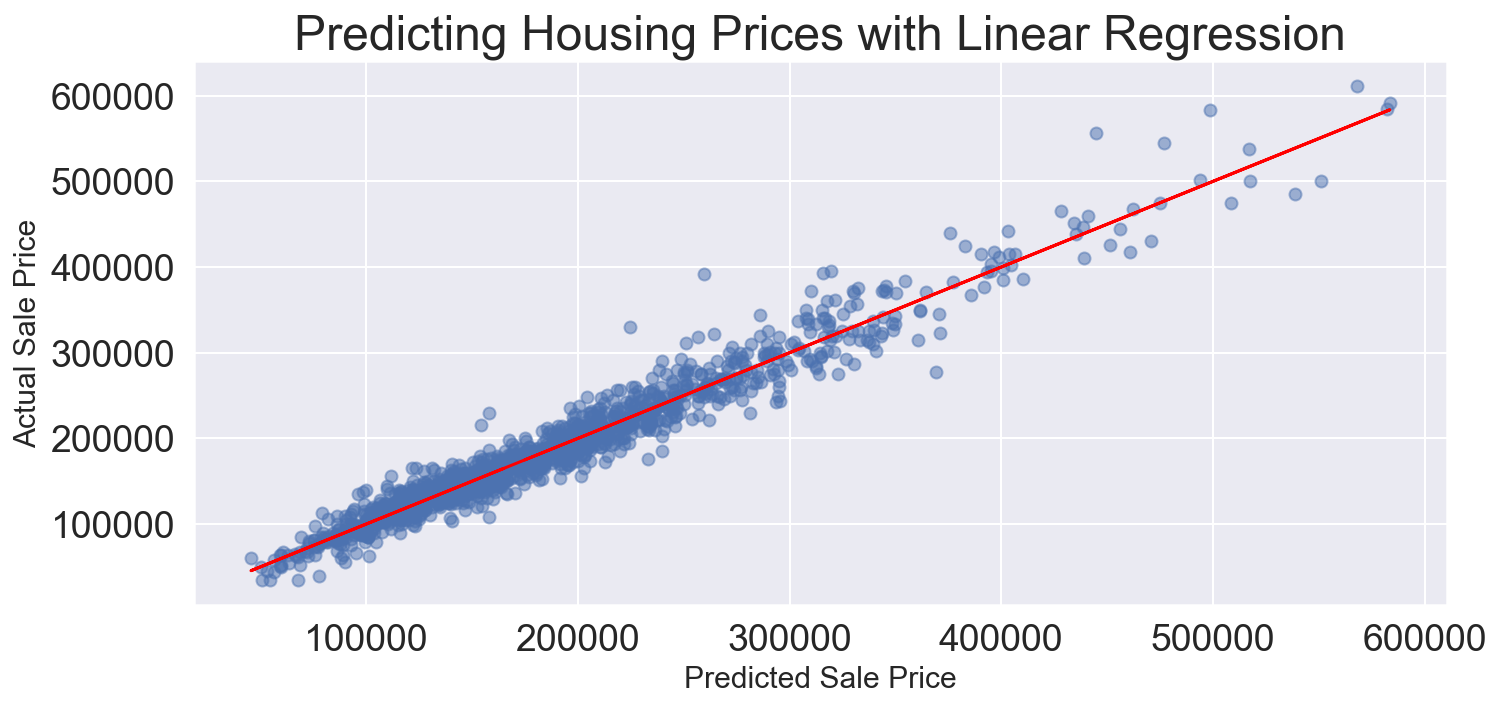

In [1045]:
plot_predictions(preds_lr_train, 'Linear Regression')

In [1046]:
# Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_lr_train))

17118.679851024976

In [1047]:
lr.score(X_train, y_train_log)

0.944219073962572

### Ridge Regression ###

In [1048]:
# Set up a list of ridge alphas to check.
# Generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
ridge_alphas = np.linspace(200, 400, 100 )

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(
    alphas = ridge_alphas,
    scoring = "r2",
    cv = 5) #How many folds

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train_log) # or y_train log 

RidgeCV(alphas=array([200.        , 202.02020202, 204.04040404, 206.06060606,
       208.08080808, 210.1010101 , 212.12121212, 214.14141414,
       216.16161616, 218.18181818, 220.2020202 , 222.22222222,
       224.24242424, 226.26262626, 228.28282828, 230.3030303 ,
       232.32323232, 234.34343434, 236.36363636, 238.38383838,
       240.4040404 , 242.42424242, 244.44444444, 246.46464646,
       248.48484848, 250.50505051, 25...
       353.53535354, 355.55555556, 357.57575758, 359.5959596 ,
       361.61616162, 363.63636364, 365.65656566, 367.67676768,
       369.6969697 , 371.71717172, 373.73737374, 375.75757576,
       377.77777778, 379.7979798 , 381.81818182, 383.83838384,
       385.85858586, 387.87878788, 389.8989899 , 391.91919192,
       393.93939394, 395.95959596, 397.97979798, 400.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [1049]:
# Optimal Alpha
ridge_cv.alpha_

264.64646464646466

In [1050]:
print(ridge_cv.score(Z_train, y_train_log))
print(ridge_cv.score(Z_test, y_test_log))

0.9381492882842295
0.9117379704532756


In [1051]:
# fitting
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(Z_train, y_train_log) # or y_train_log

Ridge(alpha=264.64646464646466, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1052]:
# predicting values with Ridge
y_hat_ridge_train = ridge.predict(Z_train) # these are log versions
y_hat_ridge_test = ridge.predict(Z_test)

In [1053]:
# Final Ridge predictions
preds_ridge_train = np.exp(y_hat_ridge_train)
preds_ridge_test = np.exp(y_hat_ridge_test)

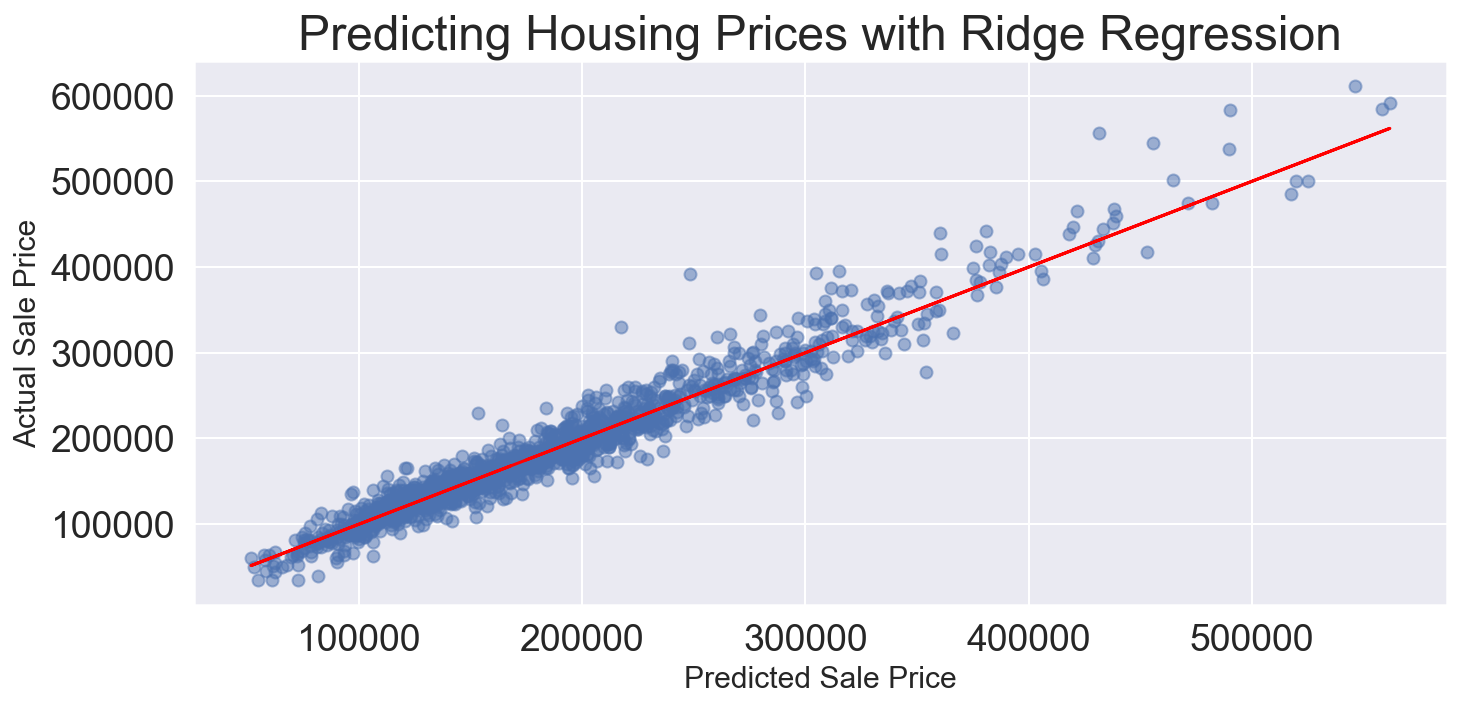

In [1054]:
plot_predictions(preds_ridge_train, 'Ridge Regression')

In [1055]:
# Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_ridge_train))

18003.21854159975

In [1056]:
# test data linear regression RMSE
np.sqrt(mean_squared_error(y_test, preds_ridge_test)) # keep updating y_test values here for the models

20213.062767913674

### LASSO

In [1057]:
# Set up a list of Lasso alphas to check.
lasso_alphas = np.linspace(0.001, 0.005, 100)

# Cross-validate over our list of Lasso alphas.
lasso = LassoCV(
    alphas = lasso_alphas,
    cv = 5,
    max_iter = 5000)

# Fit model using best ridge alpha!
lasso.fit(Z_train, y_train_log)

LassoCV(alphas=array([0.001     , 0.0010404 , 0.00108081, 0.00112121, 0.00116162,
       0.00120202, 0.00124242, 0.00128283, 0.00132323, 0.00136364,
       0.00140404, 0.00144444, 0.00148485, 0.00152525, 0.00156566,
       0.00160606, 0.00164646, 0.00168687, 0.00172727, 0.00176768,
       0.00180808, 0.00184848, 0.00188889, 0.00192929, 0.0019697 ,
       0.0020101 , 0.00205051, 0.00209091, 0.00213131, 0.00217172,
       0.0022...
       0.00443434, 0.00447475, 0.00451515, 0.00455556, 0.00459596,
       0.00463636, 0.00467677, 0.00471717, 0.00475758, 0.00479798,
       0.00483838, 0.00487879, 0.00491919, 0.0049596 , 0.005     ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [1058]:
lasso.alpha_

0.0032222222222222222

In [1059]:
print(lasso.score(Z_train, y_train_log))
print(lasso.score(Z_test, y_test_log))

0.9295124583864998
0.9219172915327078


In [1060]:
# predicting logged values with Ridge
y_hat_lasso_train = lasso.predict(Z_train)
y_hat_lasso_test = lasso.predict(Z_test)

In [1061]:
# Final Ridge predictions
preds_lasso_train = np.exp(y_hat_lasso_train)
preds_lasso_test = np.exp(y_hat_lasso_test)

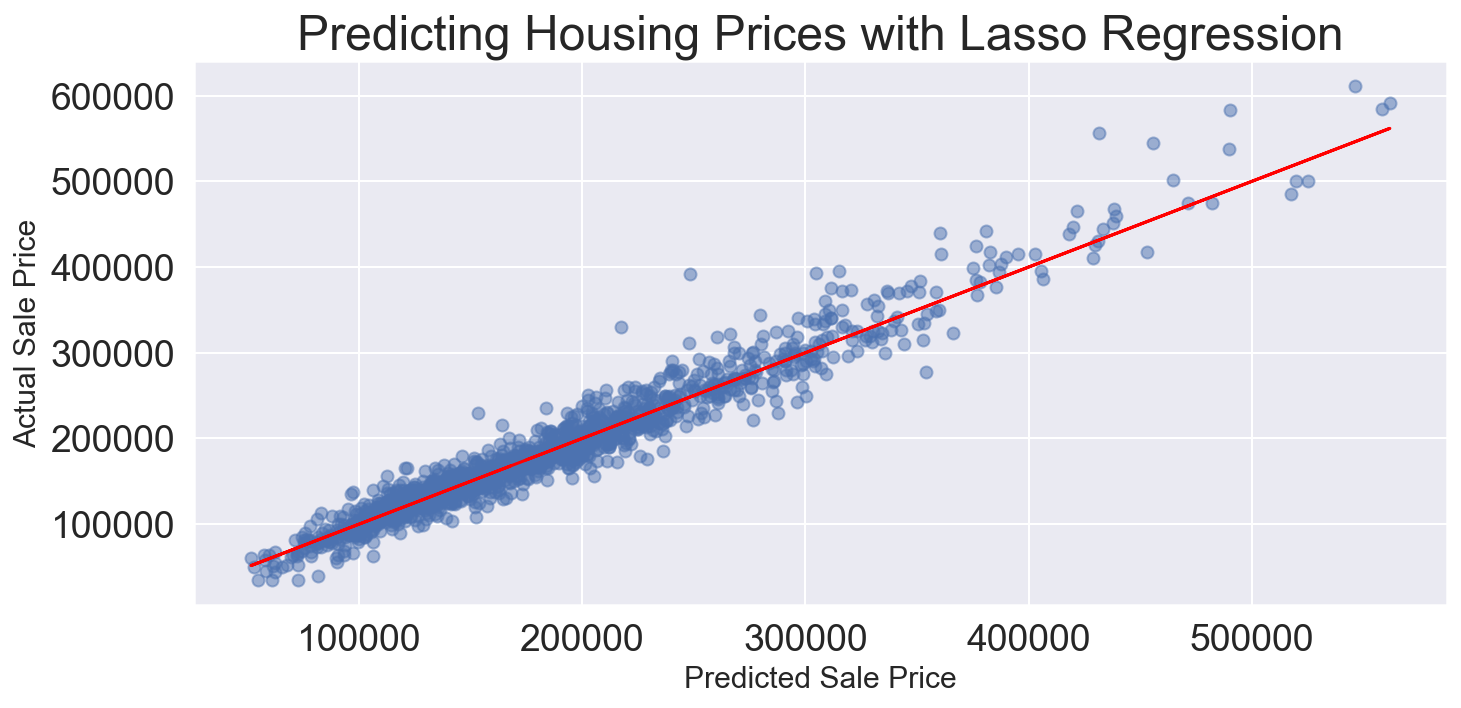

In [1062]:
plot_predictions(preds_ridge_train, 'Lasso Regression')

In [1063]:
# Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_lasso_train))

18804.563688240636

In [1064]:
# test data linear regression RMSE
np.sqrt(mean_squared_error(y_test, preds_lasso_test))

19146.65700213326

In [1077]:
lasso_coef_df = pd.DataFrame({
    'Features':X.columns,
    'coef': lasso.coef_,
    'abs_coef': np.abs(lasso.coef_)
})

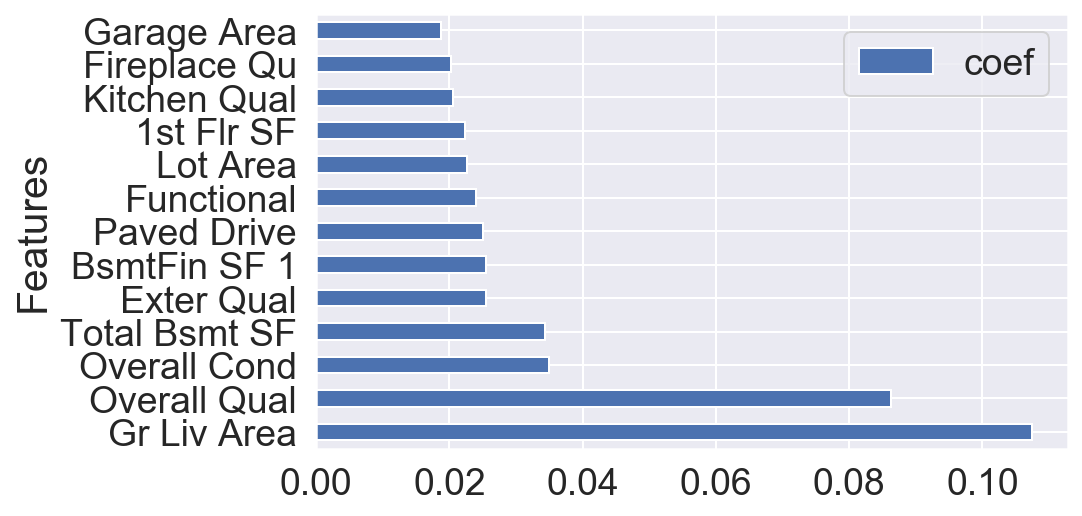

In [1078]:
lasso_coef_df[lasso_coef_df['abs_coef'] > 0.018].sort_values(by = 'abs_coef', ascending = False).set_index('Features')[['coef']].plot(kind = 'barh');

### ElasticNet Regression

In [1067]:
# Create the hyperparameter grid (THINK: how many different hyperparameter combinations are there?)
# Hyperparameters for Elastic Net: (1) Alpha, 2 L1_ratio (rho)
hyperparams = {'alpha': [0.008, 0.009, 0.01, 0.011, 0.012, 0.13, 0.14], # originally 0.01, 0.1, 10, 100
              'l1_ratio': [0.15, 0.2, 0.25, 0.27,0.29, 0.3,0.31, 0.33, 0.35, 0.4]} # 0, 0.2, 0.5, 0.7, 1

# Instantiated the GridSearch on a Elastic Net model
enet_gs = GridSearchCV(estimator = ElasticNet(), # estimator is the parent model object
                      param_grid = hyperparams,
                      cv = 5) # param_grid is the test cases for hyperparams
enet_gs.fit(Z_train, y_train_log)


# Fit it to data!                (THINK: How many models are going to be fit?)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.008, 0.009, 0.01, 0.011, 0.012, 0.13,
                                   0.14],
                         'l1_ratio': [0.15, 0.2, 0.25, 0.27, 0.29, 0.3, 0.31,
                                      0.33, 0.35, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1068]:
# See what the best average CV score is
enet_gs.best_score_

0.9082046696422977

In [1069]:
# See which combination of hyperparameters in the grid resulted in this best score
enet_gs.best_params_

{'alpha': 0.012, 'l1_ratio': 0.27}

In [1070]:
# Notice we can call this object and use it to predict. Let's call this object best_enet
best_enet = enet_gs.best_estimator_
enet_gs.best_estimator_

ElasticNet(alpha=0.012, copy_X=True, fit_intercept=True, l1_ratio=0.27,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [1071]:
# Use this to make predictions and score them
best_enet.score(Z_test, y_test_log)

0.9219885049100859

In [1072]:
# predicting
enet_model_preds_train = enet_gs.predict(Z_train)
enet_model_preds = enet_gs.predict(Z_test)

# Evaluate model.
print(enet_gs.score(Z_train, y_train_log))
print(enet_gs.score(Z_test, y_test_log))

0.9293399150186428
0.9219885049100859


In [1073]:
# Final Enet Predictions
preds_enet_train = np.exp(enet_model_preds_train)
preds_enet_test = np.exp(enet_model_preds)

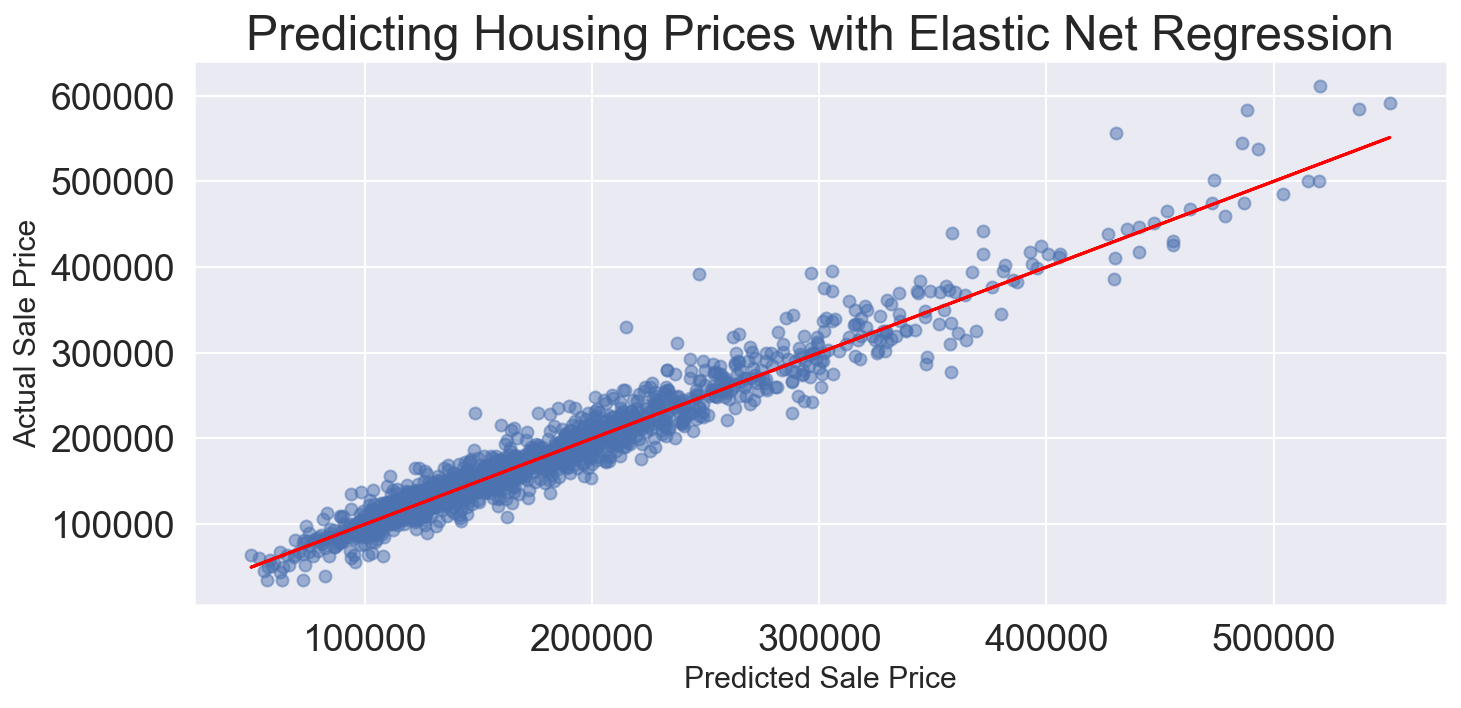

In [1075]:
plot_predictions(preds_enet_train, 'Elastic Net Regression')

### Outputting Kaggle

In [859]:
X_kaggle = df_test

In [860]:
# Scaling data
X_kaggle_sc = sc.transform(X_kaggle)

In [863]:
# Enet Regression
preds_kaggle_log = enet_gs.predict(X_kaggle_sc)
X_kaggle['SalePrice'] = np.exp(preds_kaggle_log)

In [864]:
output = X_kaggle[['SalePrice']]

In [866]:
# Creating CSV file
output.to_csv('./datasets/EnetRegression_6OutliersRemoved.csv')